In [1]:
# Importing Basic Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn import metrics
from sklearn import preprocessing

from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### Model Analysis

After sampling and one-hot encoding of the dataset, we can finally test different types of model on it. In this section, we will fit one of the samples created in the previous module on different Machine Learning Algorithms, namely:

Logistic Regression

Multilayer Perceptron

Decision Tree 

Naive Bayes

K-Nearest Neighbor

Since the data is skewed towards the Non-Fraud transactions and we are trying to maximize True Positives while minimizing False Positives, the metric used for evaluating the performance of the models shall be the f1-score, which takes both precision and recall into account.

Note that the scores are obtained using 'metrics.f1_score(y_test, y_pred, average="binary")'.
The average here is kept as binary since this is a two-class problem

In [2]:
df = pd.read_csv("Datasets/ohe_sampled_cc_1.csv")
df

,Unnamed: 0,Merchant_State=AA,Merchant_State=AK,Merchant_State=AL,Merchant_State=AR,Merchant_State=AZ,Merchant_State=Albania,Merchant_State=Algeria,Merchant_State=Andorra,Merchant_State=Angola,...,Month,Day,Time,Amount,Merchant_Name,Merchant_City,Zip,MCC,Errors,Is_Fraud
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575126,24386290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,24.0,12.0,144.98,-5.467922e+18,19.0,19.0,5912.0,283991.0,No
575127,24386370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,12.0,7.0,22.01,-5.841929e+18,45373.0,45373.0,4121.0,283991.0,No
575128,24386502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.0,14.0,7.0,44.93,-6.160036e+18,45373.0,45373.0,4121.0,283991.0,No
575129,24386615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0,9.0,19.0,44.93,2.500999e+18,19.0,19.0,4121.0,283991.0,No


In [3]:
df.drop("Unnamed: 0", 1, inplace=True)

In [4]:
df=df.replace(np.NaN, 0)
df=df.replace('No', 0)
df=df.replace('Yes', 1)

In [5]:
classes=df['Is_Fraud'].value_counts()
normal_share=classes[0]/df['Is_Fraud'].count()*100
fraud_share=classes[1]/df['Is_Fraud'].count()*100
print(normal_share)
print(fraud_share)

94.8260483263813
5.173951673618706


In [6]:
df.shape

(575131, 248)

In [7]:
df.size

142632488

### Splitting into Train and Test Data

In [8]:
y= df["Is_Fraud"]  
X= df.drop(["Is_Fraud"],axis=1)

In [9]:
from sklearn import model_selection
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, train_size=0.7, random_state=42)
sss.get_n_splits(X, y)

for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

TRAIN: [259815 261104 236196 ... 133911  58079 407990] TEST: [456014 137476 486835 ...  34975 217165 344015]
TRAIN: [275637 361964 334410 ... 245408 139721 358103] TEST: [ 12467 296244  35000 ... 318193 274874 112531]
TRAIN: [102438 401762 570377 ...  38299 570358 112289] TEST: [552395  18381 113017 ... 454781 319210 471034]
TRAIN: [ 66503 372073 343020 ... 166672  66740 512035] TEST: [285272  84573   3235 ... 313107  25229  34232]
TRAIN: [383859 320943 399457 ... 201021 540199 219593] TEST: [452132  29810  40060 ... 536375 239827 300171]


### Calculating Model Metrics

Along with the values of precision, recall and f1-score, the confusion matrix for each class on the test dataset is also plotted to get a good idea of how the model is classifying the test data

In [10]:
from sklearn.metrics import confusion_matrix

def K_Fold_And_Print_Metrics(mlp_clf, X, y, useMinMax=True):
    kfold = model_selection.KFold(5, shuffle=True, random_state=2)

    prec, rec, f1 = [], [], []

    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
        if(useMinMax):
            X_scaler = preprocessing.MinMaxScaler()
            X_train = X_scaler.fit_transform(X_train)
            X_test = X_scaler.transform(X_test)
    
        print("fitting iteration")
        mlp_clf.fit(X_train, y_train)
        y_pred = mlp_clf.predict(X_test)
        
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0, 1]).ravel()
        print(tn, fp, fn, tp)
        
        
    
        #print(y_pred)
        #print(y_test)
    
        rec += [metrics.recall_score(y_test, y_pred, average="binary")]
        prec += [metrics.precision_score(y_test, y_pred, average="binary")]
        f1 += [metrics.f1_score(y_test, y_pred, average="binary")]
    
        #print()

    print("recall    = {:.4f} ±{:.4f}".format(np.mean(rec), np.std(rec)))
    print("precision = {:.4f} ±{:.4f}".format(np.mean(prec), np.std(prec)))
    print("f1        = {:.4f} ±{:.4f}".format(np.mean(f1), np.std(f1)))

### Logistic Regression

fitting iteration
59551 16786 2098 2084
fitting iteration
59228 17084 2115 2091
fitting iteration
59251 17194 2066 2007
fitting iteration
59095 17153 2143 2127
fitting iteration
59353 17066 2066 2033
recall    = 0.4965 ±0.0020
precision = 0.1082 ±0.0023
f1        = 0.1776 ±0.0033

------ Test Scores: -------
[0.4905343340427915]
[0.10711053494117359]
[0.17582814695844207]


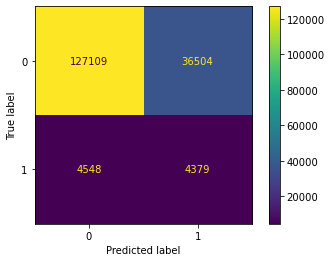

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=0.1)
K_Fold_And_Print_Metrics(lr, X_train, y_train, False)

plot_confusion_matrix(lr, X_test, y_test)

y_pred = lr.predict(X_test)
print()
print("------ Test Scores: -------")
print( [metrics.recall_score(y_test, y_pred, average="binary")] )
print ( [metrics.precision_score(y_test, y_pred, average="binary")] )
print ( [metrics.f1_score(y_test, y_pred, average="binary")] )

### Multilayer Perceptron

fitting iteration
76337 0 4182 0
fitting iteration
76312 0 4206 0
fitting iteration
19321 57124 2066 2007
fitting iteration
59095 17153 2143 2127
fitting iteration
57046 19373 2033 2066
recall    = 0.2990 ±0.2441
precision = 0.0481 ±0.0470
f1        = 0.0812 ±0.0773

------ Test Scores: -------
[0.5094656659572084]
[0.09934035210344677]
[0.16626149262461387]


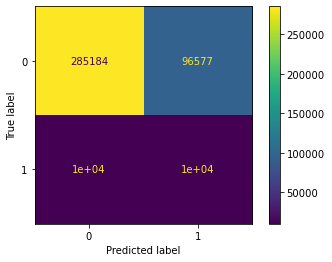

In [13]:
from sklearn.neural_network import MLPClassifier
mlp_clf_1_relu = MLPClassifier(hidden_layer_sizes=(20,20), max_iter=1000, activation="relu", solver='lbfgs')

K_Fold_And_Print_Metrics(mlp_clf_1_relu, X_train, y_train, False)

plot_confusion_matrix(mlp_clf_1_relu, X_train, y_train)

y_pred = mlp_clf_1_relu.predict(X_test)
print()
print("------ Test Scores: -------")
print( [metrics.recall_score(y_test, y_pred, average="binary")] )
print ( [metrics.precision_score(y_test, y_pred, average="binary")] )
print ( [metrics.f1_score(y_test, y_pred, average="binary")] )

#scaling the data
X_scaler = preprocessing.MinMaxScaler()
X_train_sc = X_scaler.fit_transform(X_train)
X_test_sc = X_scaler.transform(X_test)

#mlp_clf_1_relu = MLPClassifier(hidden_layer_sizes=(20,20), max_iter=1000, activation="relu", solver='lbfgs')

In [14]:
X_train.shape

(402591, 247)

After a poor performance of MLP, it would be wise to try out different parameters for the same to check if the scores increase

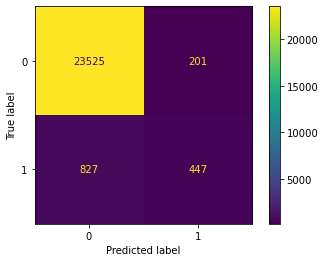

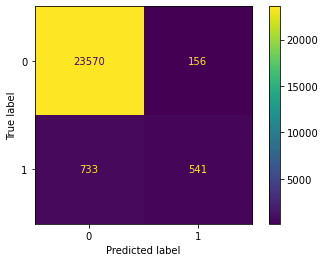

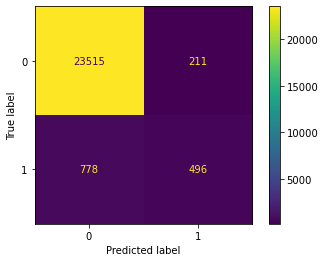

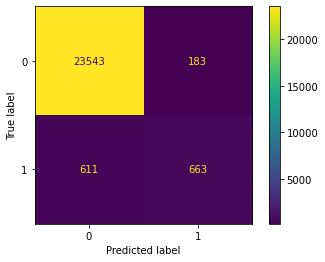

In [15]:
#Figuring Out which MLP with scaled data predicts best with confusion matrix

split_index = 25000

mlp_clf_1_relu = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000, activation="relu", solver='lbfgs')
mlp_clf_1_relu.fit(X_train_sc[:split_index], y_train[:split_index])
plot_confusion_matrix(mlp_clf_1_relu, X_test_sc[:split_index], y_test[:split_index])

mlp_clf_1_relu = MLPClassifier(hidden_layer_sizes=(20,20), max_iter=1000, activation="relu", solver='lbfgs')
mlp_clf_1_relu.fit(X_train_sc[:split_index], y_train[:split_index])
plot_confusion_matrix(mlp_clf_1_relu, X_test_sc[:split_index], y_test[:split_index])

mlp_clf_1_relu = MLPClassifier(hidden_layer_sizes=(20,20,20,20), max_iter=1000, activation="relu", solver='lbfgs')
mlp_clf_1_relu.fit(X_train_sc[:split_index], y_train[:split_index])
plot_confusion_matrix(mlp_clf_1_relu, X_test_sc[:split_index], y_test[:split_index])

mlp_clf_1_relu = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=1000, activation="relu", solver='lbfgs')
mlp_clf_1_relu.fit(X_train_sc[:split_index], y_train[:split_index])
plot_confusion_matrix(mlp_clf_1_relu, X_test_sc[:split_index], y_test[:split_index])


fitting iteration
76337 0 4182 0
fitting iteration
76312 0 4206 0
fitting iteration
76445 0 4073 0
fitting iteration
76248 0 4270 0
fitting iteration
76419 0 4099 0
recall    = 0.0000 ±0.0000
precision = 0.0000 ±0.0000
f1        = 0.0000 ±0.0000


------ Test Scores: -------
[0.0]
[0.0]
[0.0]


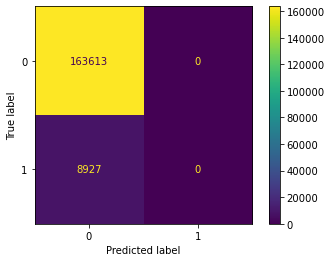

In [16]:
mlp_clf_1_tanh = MLPClassifier(hidden_layer_sizes=(20,20), max_iter=1000, activation="tanh", solver='lbfgs')

K_Fold_And_Print_Metrics(mlp_clf_1_tanh, X_train, y_train, False)

print()
#print("---------- Metrics with MinMaxScaler -----------")

#mlp_clf_1_tanh = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=200, activation="relu", solver='lbfgs')

#K_Fold_And_Print_Metrics(mlp_clf_1_tanh, X_train, y_train, True)

plot_confusion_matrix(mlp_clf_1_tanh, X_test, y_test)

y_pred = mlp_clf_1_tanh.predict(X_test)
print()
print("------ Test Scores: -------")
print( [metrics.recall_score(y_test, y_pred, average="binary")] )
print ( [metrics.precision_score(y_test, y_pred, average="binary")] )
print ( [metrics.f1_score(y_test, y_pred, average="binary")] )

The scores of perceptron still did not increase and it continues to perform poorly

### Decision Tree

fitting iteration
75758 579 534 3648
fitting iteration
75780 532 548 3658
fitting iteration
75880 565 524 3549
fitting iteration
75642 606 575 3695
fitting iteration
75835 584 548 3551
recall    = 0.8690 ±0.0027
precision = 0.8633 ±0.0052
f1        = 0.8661 ±0.0034

------ Test Scores: -------
[0.8786826481460737]
[0.8652106772556806]
[0.8718946256877674]


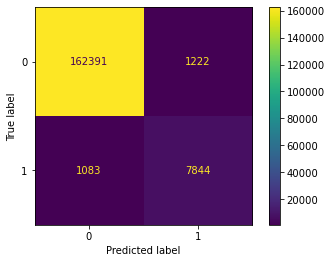

In [18]:
from sklearn import tree

infoGain_clf= sklearn.tree.DecisionTreeClassifier(criterion='entropy')

K_Fold_And_Print_Metrics(infoGain_clf, X_train, y_train, False)

plot_confusion_matrix(infoGain_clf, X_test, y_test)

y_pred = infoGain_clf.predict(X_test)
print()
print("------ Test Scores: -------")
print( [metrics.recall_score(y_test, y_pred, average="binary")] )
print ( [metrics.precision_score(y_test, y_pred, average="binary")] )
print ( [metrics.f1_score(y_test, y_pred, average="binary")] )

### Naive Bayes

fitting iteration
40746 35591 46 4136
fitting iteration
40360 35952 47 4159
fitting iteration
40437 36008 40 4033
fitting iteration
40282 35966 51 4219
fitting iteration
40456 35963 49 4050
recall    = 0.9888 ±0.0008
precision = 0.1029 ±0.0017
f1        = 0.1865 ±0.0027

------ Test Scores: -------
[0.9902542847541167]
[0.10335071433581967]
[0.1871671906924551]


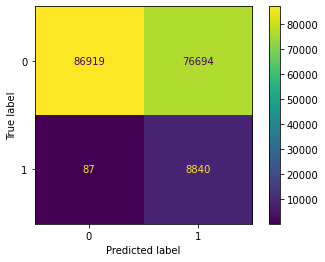

In [20]:
from sklearn.naive_bayes import BernoulliNB
clf_NB_1 = BernoulliNB()
K_Fold_And_Print_Metrics(clf_NB_1, X_train, y_train, False)

plot_confusion_matrix(clf_NB_1, X_test, y_test)

y_pred = clf_NB_1.predict(X_test)
print()
print("------ Test Scores: -------")
print( [metrics.recall_score(y_test, y_pred, average="binary")] )
print ( [metrics.precision_score(y_test, y_pred, average="binary")] )
print ( [metrics.f1_score(y_test, y_pred, average="binary")] )

fitting iteration
76337 0 4182 0
fitting iteration
76312 0 4206 0
fitting iteration
76445 0 4073 0
fitting iteration
76248 0 4270 0
fitting iteration
76419 0 4099 0
recall    = 0.0000 ±0.0000
precision = 0.0000 ±0.0000
f1        = 0.0000 ±0.0000

------ Test Scores: -------
[0.0]
[0.0]
[0.0]


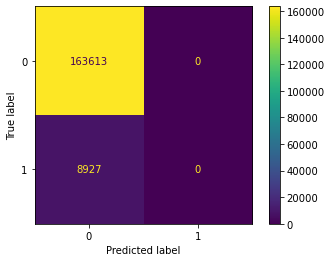

In [21]:
from sklearn.naive_bayes import GaussianNB

clf_NB_2 = GaussianNB()
K_Fold_And_Print_Metrics(clf_NB_2, X_train, y_train, False)

plot_confusion_matrix(clf_NB_2, X_test, y_test)

y_pred = clf_NB_2.predict(X_test)
print()
print("------ Test Scores: -------")
print( [metrics.recall_score(y_test, y_pred, average="binary")] )
print ( [metrics.precision_score(y_test, y_pred, average="binary")] )
print ( [metrics.f1_score(y_test, y_pred, average="binary")] )

### K-Nearest Neighbor

For K-Nearest Neighbor implementation, we will reduce the dimensionality of the problem using PCA. This is because KNN classifiers calculate distances and hence are susceptible to the curse of dimensionality

In [23]:
#PCA example
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X_train)
X_transform = pca.transform(X_train)

pca.fit(X_test)
X_transform_test = pca.transform(X_test)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn =KNeighborsClassifier(n_neighbors=3)

df_x_pca = pd.DataFrame(X_transform)

K_Fold_And_Print_Metrics(knn, df_x_pca, y_train, False)

#plot_confusion_matrix(knn, X_transform_test, y_test)

fitting iteration
75996 341 892 3290
fitting iteration
75914 398 885 3321
fitting iteration
76110 335 888 3185
fitting iteration
75873 375 915 3355
fitting iteration
76072 347 890 3209
recall    = 0.7854 ±0.0027
precision = 0.9012 ±0.0047
f1        = 0.8393 ±0.0015


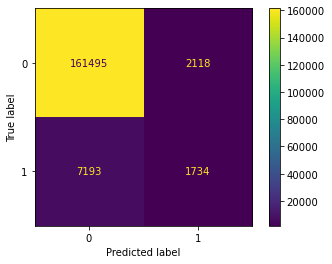

In [25]:
df_x_pca_test = pd.DataFrame(X_transform_test)
plot_confusion_matrix(knn, df_x_pca_test, y_test)

In [26]:
y_pred = knn.predict(df_x_pca_test)
print( [metrics.recall_score(y_test, y_pred, average="binary")] )
print ( [metrics.precision_score(y_test, y_pred, average="binary")] )
print ( [metrics.f1_score(y_test, y_pred, average="binary")] )

[0.19424218662484596]
[0.4501557632398754]
[0.27138273730338835]


From the above test observations, it is evident that a decision tree classifier would be the best option to solve this problem since it outputs the highest f1-score of 0.8718946256877674 on the test data